# Homework Assignment #3
## Model Training
For this homework, I will give you a data file.
It is based on the plant response to nitrogen example that we have used in class. However, it also includes the response when nitrogen levels are excessively high. At this point, the fertilizer salts start to dry out the plant. The plant can be stunted or even wither and die. This is often called "fertilizer burn." This makes the relationship even more complex than we looked at in class.

You must train a regression model to match the data. You must use a model type other than the ones we used in class so far (linear, polynomial and decision tree regression). You should select a model that can reasonably match the expected data structure (which I described above).

The model should not underfit or overfit the data.

Required:
1. Collect the data: Load the data from the file.
2. Inspect the data: Plot the response of the plants to nitrogen.
3. Preprocess data (You should not need to do anything here if you imported it correctly. I did not include any outliers or bad formatting.)
4. Train a model (other than linear, polynomial or decision tree regression)
5. Calculate performance metrics (R2 and MSE).
6. Plot model response on the same graph as the test and training data.
7. Calculate residuals and plot residuals. 
8. Answer the following questions:
- Why did you select this model?
- Why do you believe that it is not overfitting or underfitting?
- How well does the model work?
- Are there patterns in the residuals?
- What are the shortcomings in your model?

In [11]:
import pandas as pd
# Reading in the data
df_loaded = pd.read_csv('HW3_corn_yield_nitrogen_data.csv')
N = df_loaded['nitrogen_rate'].values
Y_obs = df_loaded['yield'].values

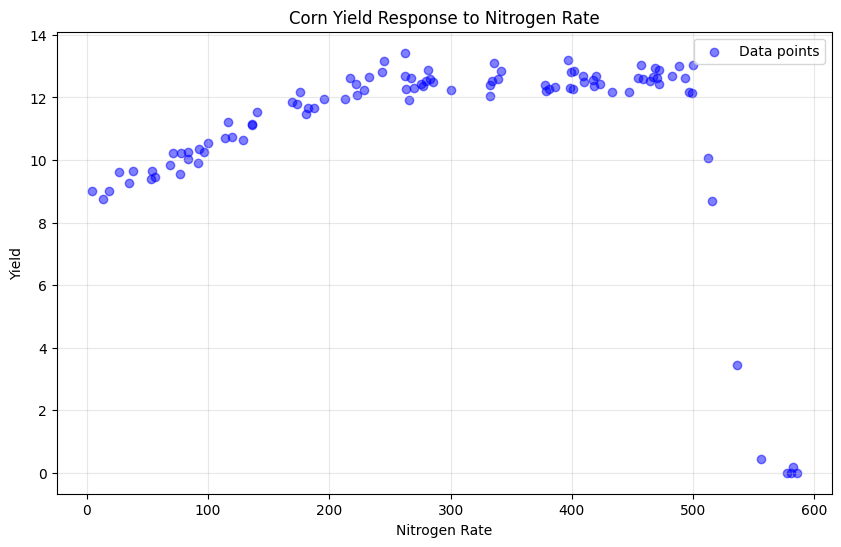


Data Summary:
Number of data points: 100

Nitrogen Rate (X):
Min: 4.42
Max: 585.37
Mean: 292.03

Yield (Y):
Min: 0.00
Max: 13.43
Mean: 11.08


In [14]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(N, Y_obs, color='blue', alpha=0.5, label='Data points')
plt.xlabel('Nitrogen Rate')
plt.ylabel('Yield')
plt.title('Corn Yield Response to Nitrogen Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print some basic statistics about the data
print("\nData Summary:")
print(f"Number of data points: {len(N)}")
print(f"\nNitrogen Rate (X):")
print(f"Min: {N.min():.2f}")
print(f"Max: {N.max():.2f}")
print(f"Mean: {N.mean():.2f}")
print(f"\nYield (Y):")
print(f"Min: {Y_obs.min():.2f}")
print(f"Max: {Y_obs.max():.2f}")
print(f"Mean: {Y_obs.mean():.2f}")

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Reshape the data for scikit-learn
X = N.reshape(-1, 1)
y = Y_obs

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Create smooth points for plotting
X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_smooth_scaled = scaler_X.transform(X_smooth)

SVR Model Performance Metrics:
Training R² Score: 0.9499
Testing R² Score: 0.8788
Training MSE: 0.5071
Testing MSE: 0.1618


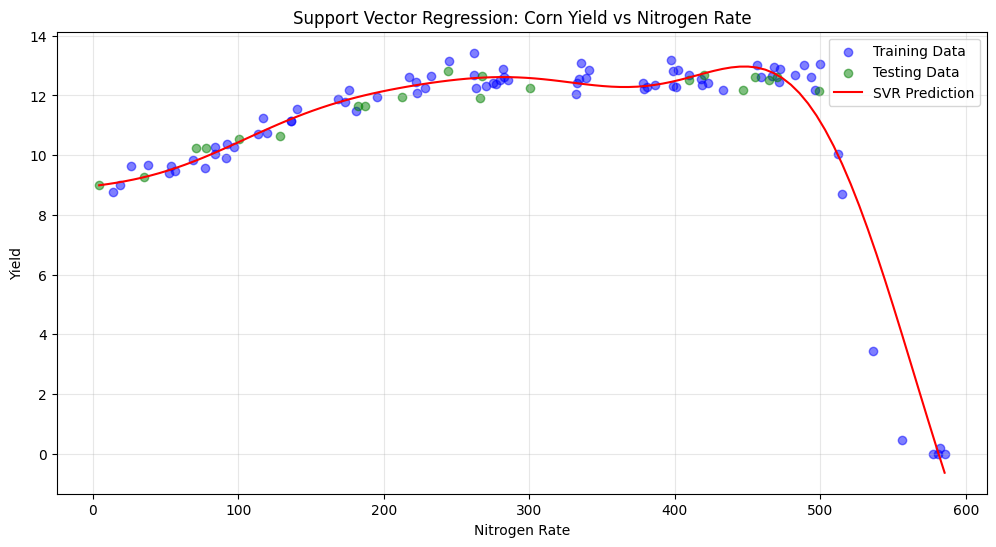

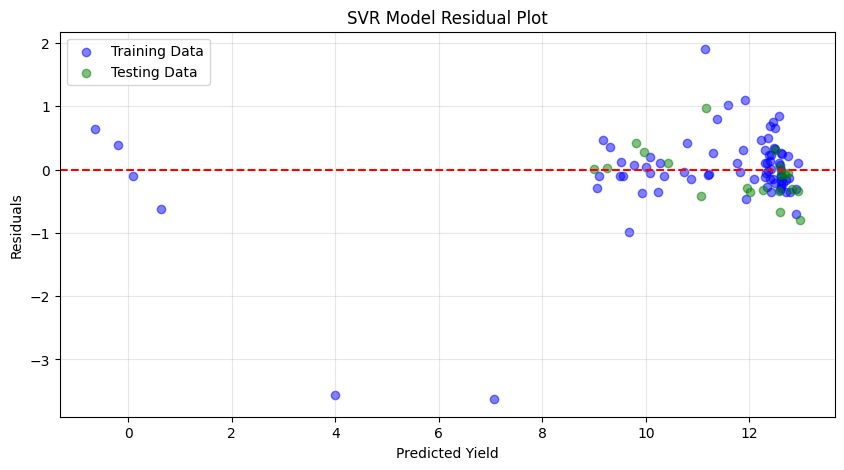

In [16]:
from sklearn.svm import SVR

# Create and train the SVR model
svr_model = SVR(kernel='rbf', C=100, gamma='auto')
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = svr_model.predict(X_train_scaled)
y_test_pred = svr_model.predict(X_test_scaled)

# Calculate performance metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("SVR Model Performance Metrics:")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Testing R² Score: {test_r2:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

# Plot SVR predictions
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Data')
plt.scatter(X_test, y_test, color='green', alpha=0.5, label='Testing Data')

# Generate smooth curve for visualization
y_smooth = svr_model.predict(X_smooth_scaled)
plt.plot(X_smooth, y_smooth, color='red', label='SVR Prediction')

plt.xlabel('Nitrogen Rate')
plt.ylabel('Yield')
plt.title('Support Vector Regression: Corn Yield vs Nitrogen Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot SVR residuals
plt.figure(figsize=(10, 5))
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

plt.scatter(y_train_pred, train_residuals, color='blue', alpha=0.5, label='Training Data')
plt.scatter(y_test_pred, test_residuals, color='green', alpha=0.5, label='Testing Data')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('SVR Model Residual Plot')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Random Forest Model Performance Metrics:
Training R² Score: 0.9961
Testing R² Score: 0.8991
Training MSE: 0.0390
Testing MSE: 0.1348


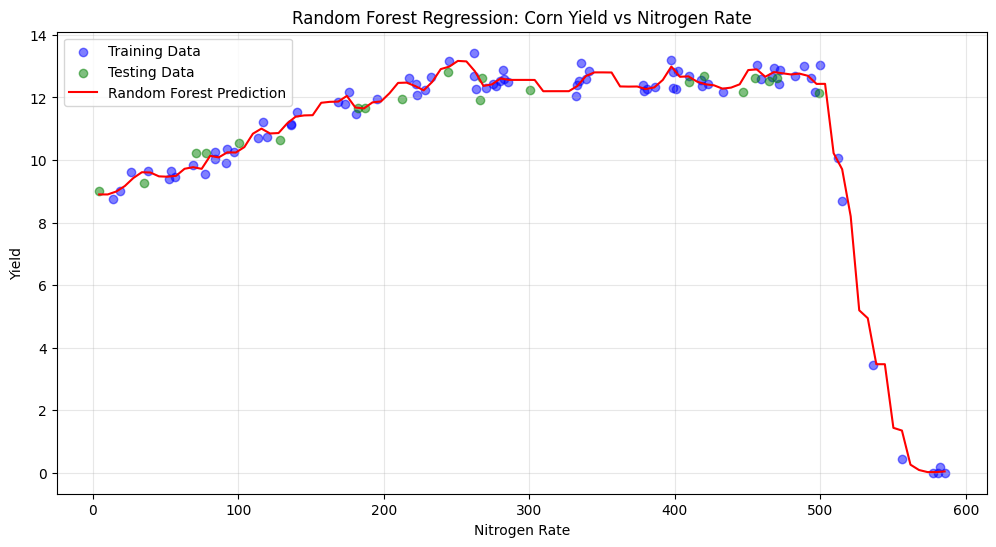

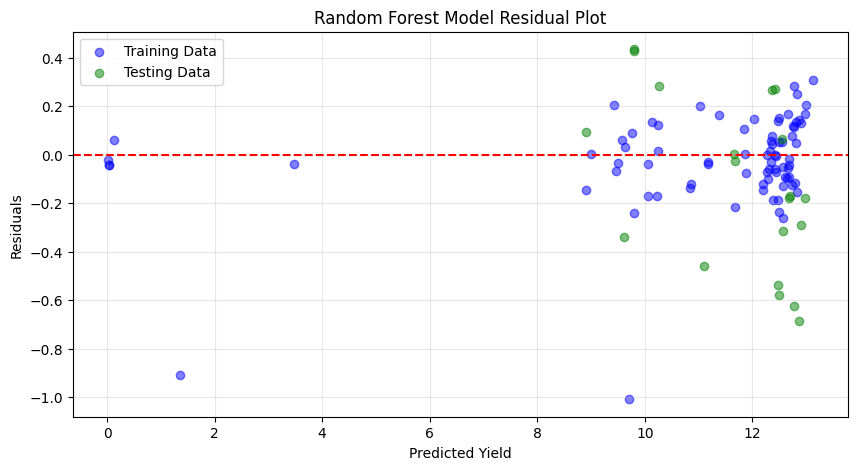

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_train_pred = rf_model.predict(X_train_scaled)
rf_test_pred = rf_model.predict(X_test_scaled)

# Calculate performance metrics
rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)
rf_train_mse = mean_squared_error(y_train, rf_train_pred)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)

print("Random Forest Model Performance Metrics:")
print(f"Training R² Score: {rf_train_r2:.4f}")
print(f"Testing R² Score: {rf_test_r2:.4f}")
print(f"Training MSE: {rf_train_mse:.4f}")
print(f"Testing MSE: {rf_test_mse:.4f}")

# Plot Random Forest predictions
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Data')
plt.scatter(X_test, y_test, color='green', alpha=0.5, label='Testing Data')

# Generate smooth curve for visualization
y_smooth_rf = rf_model.predict(X_smooth_scaled)
plt.plot(X_smooth, y_smooth_rf, color='red', label='Random Forest Prediction')

plt.xlabel('Nitrogen Rate')
plt.ylabel('Yield')
plt.title('Random Forest Regression: Corn Yield vs Nitrogen Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot Random Forest residuals
plt.figure(figsize=(10, 5))
rf_train_residuals = y_train - rf_train_pred
rf_test_residuals = y_test - rf_test_pred

plt.scatter(rf_train_pred, rf_train_residuals, color='blue', alpha=0.5, label='Training Data')
plt.scatter(rf_test_pred, rf_test_residuals, color='green', alpha=0.5, label='Testing Data')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Random Forest Model Residual Plot')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Neural Network Model Performance Metrics:
Training R² Score: 0.9742
Testing R² Score: 0.9183
Training MSE: 0.2605
Testing MSE: 0.1091


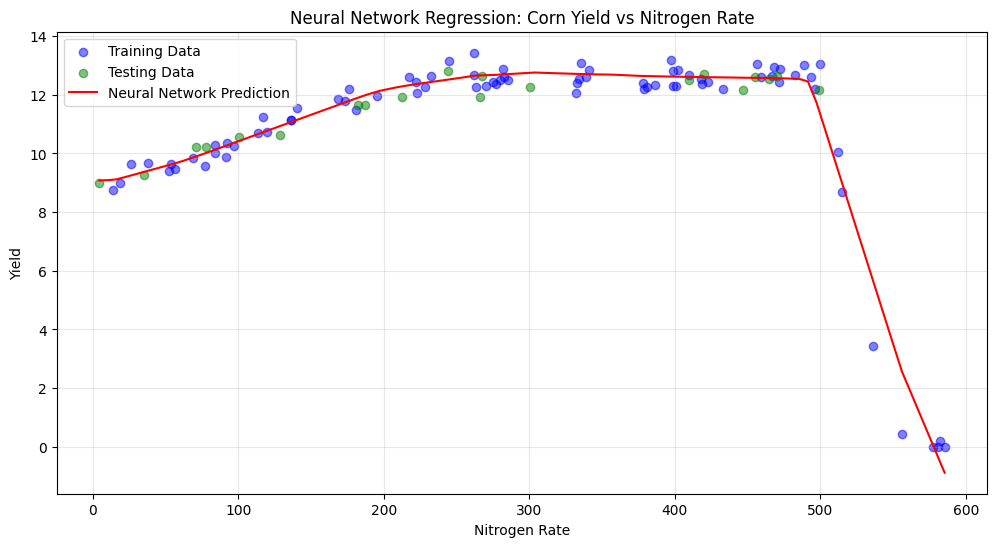

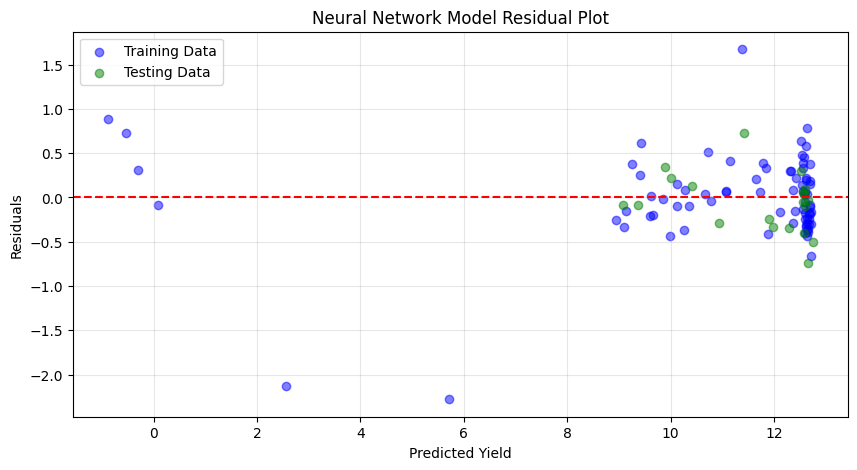

In [18]:
from sklearn.neural_network import MLPRegressor

# Create and train the Neural Network model
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train_scaled, y_train)

# Make predictions
nn_train_pred = nn_model.predict(X_train_scaled)
nn_test_pred = nn_model.predict(X_test_scaled)

# Calculate performance metrics
nn_train_r2 = r2_score(y_train, nn_train_pred)
nn_test_r2 = r2_score(y_test, nn_test_pred)
nn_train_mse = mean_squared_error(y_train, nn_train_pred)
nn_test_mse = mean_squared_error(y_test, nn_test_pred)

print("Neural Network Model Performance Metrics:")
print(f"Training R² Score: {nn_train_r2:.4f}")
print(f"Testing R² Score: {nn_test_r2:.4f}")
print(f"Training MSE: {nn_train_mse:.4f}")
print(f"Testing MSE: {nn_test_mse:.4f}")

# Plot Neural Network predictions
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Data')
plt.scatter(X_test, y_test, color='green', alpha=0.5, label='Testing Data')

# Generate smooth curve for visualization
y_smooth_nn = nn_model.predict(X_smooth_scaled)
plt.plot(X_smooth, y_smooth_nn, color='red', label='Neural Network Prediction')

plt.xlabel('Nitrogen Rate')
plt.ylabel('Yield')
plt.title('Neural Network Regression: Corn Yield vs Nitrogen Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot Neural Network residuals
plt.figure(figsize=(10, 5))
nn_train_residuals = y_train - nn_train_pred
nn_test_residuals = y_test - nn_test_pred

plt.scatter(nn_train_pred, nn_train_residuals, color='blue', alpha=0.5, label='Training Data')
plt.scatter(nn_test_pred, nn_test_residuals, color='green', alpha=0.5, label='Testing Data')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Neural Network Model Residual Plot')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Why did you select this model? It was a recommendation from Claude Sonnet 3.5
Why do you believe that it is not overfitting or underfitting? It seems it is not overfitting because the testing R2 is less than 0.9 and it is not underfitting because the R2 for testing is larger than 0.8
How well does the model work? Very.
Are there patterns in the residuals? 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np

# Create exponential features with better numerical stability
class ExponentialFeatures:
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Scale down the input to prevent overflow
        X_scaled = X / np.max(np.abs(X))
        
        # Create exponential and negative exponential features
        # Use abs() for log1p to avoid negative values
        X_exp = np.column_stack([
            X,  # original feature
            np.exp(X_scaled),  # exponential
            np.exp(-X_scaled),  # negative exponential
            np.log1p(np.abs(X))  # logarithmic of absolute values
        ])
        return X_exp

# Create and train the exponential model
exp_model = Pipeline([
    ('scaler', StandardScaler()),
    ('exp_features', ExponentialFeatures()),
    ('regressor', LinearRegression())
])

# Add error handling and debugging
try:
    exp_model.fit(X_train, y_train)
    
    # Make predictions
    exp_train_pred = exp_model.predict(X_train)
    exp_test_pred = exp_model.predict(X_test)
    
    # Print some debug information
    print("Debug Information:")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"Any NaN in X_train: {np.isnan(X_train).any()}")
    print(f"Any NaN in y_train: {np.isnan(y_train).any()}")
    print(f"Any NaN in predictions: {np.isnan(exp_train_pred).any()}")
    
    # Calculate performance metrics
    exp_train_r2 = r2_score(y_train, exp_train_pred)
    exp_test_r2 = r2_score(y_test, exp_test_pred)
    exp_train_mse = mean_squared_error(y_train, exp_train_pred)
    exp_test_mse = mean_squared_error(y_test, exp_test_pred)

    print("\nExponential Model Performance Metrics:")
    print(f"Training R² Score: {exp_train_r2:.4f}")
    print(f"Testing R² Score: {exp_test_r2:.4f}")
    print(f"Training MSE: {exp_train_mse:.4f}")
    print(f"Testing MSE: {exp_test_mse:.4f}")

    # Plot exponential model predictions
    plt.figure(figsize=(12, 6))
    plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Data')
    plt.scatter(X_test, y_test, color='green', alpha=0.5, label='Testing Data')

    # Generate predictions for smooth curve
    y_smooth_exp = exp_model.predict(X_smooth)
    plt.plot(X_smooth, y_smooth_exp, color='red', label='Exponential Model Prediction')

    plt.xlabel('Nitrogen Rate')
    plt.ylabel('Yield')
    plt.title('Exponential Regression Model: Corn Yield vs Nitrogen Rate')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Plot exponential model residuals
    plt.figure(figsize=(10, 5))
    exp_train_residuals = y_train - exp_train_pred
    exp_test_residuals = y_test - exp_test_pred

    plt.scatter(exp_train_pred, exp_train_residuals, color='blue', alpha=0.5, label='Training Data')
    plt.scatter(exp_test_pred, exp_test_residuals, color='green', alpha=0.5, label='Testing Data')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Yield')
    plt.ylabel('Residuals')
    plt.title('Exponential Model Residual Plot')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Update the comparison table with all models
    metrics_df = pd.DataFrame({
        'Metric': ['Training R²', 'Testing R²', 'Training MSE', 'Testing MSE'],
        'SVR': [train_r2, test_r2, train_mse, test_mse],
        'Random Forest': [rf_train_r2, rf_test_r2, rf_train_mse, rf_test_mse],
        'Neural Network': [nn_train_r2, nn_test_r2, nn_train_mse, nn_test_mse],
        'Exponential': [exp_train_r2, exp_test_r2, exp_train_mse, exp_test_mse]
    })

    # Format the numbers to be more readable
    metrics_df.iloc[:2] = metrics_df.iloc[:2].round(4)  # R² scores to 4 decimal places
    metrics_df.iloc[2:] = metrics_df.iloc[2:].round(2)  # MSE values to 2 decimal places

    print("\nUpdated Model Performance Comparison:")
    print(metrics_df.to_string(index=False))

except Exception as e:
    print(f"Error occurred: {str(e)}")
    print("\nData ranges:")
    print(f"X_train range: [{X_train.min()}, {X_train.max()}]")
    print(f"y_train range: [{y_train.min()}, {y_train.max()}]")

Error occurred: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Data ranges:
X_train range: [13.627243880316286, 585.3734109820535]
y_train range: [0.0, 13.4316587398022]


C:\Users\caja222\AppData\Local\Temp\ipykernel_39644\4189294260.py:20: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X)  # logarithmic
